## Example 4 : Source counts in LoTSS Data Release 2 

The LOFAR Two-metre Sky Survey has released the second set of data. 
For a description of the data release see the publication 

https://arxiv.org/abs/2202.11733
     
(click on 'PDF' to get the actual publication).

The data are made public by ASTRON. For instance, the catalog of all source can be accessed via 

https://vo.astron.nl/lotss_dr2/q/src_cone/form


To convert angles the astropy angle tool might be useful

In [6]:
from astropy.coordinates import Angle
from astropy import units as u
a = Angle('18h20m30.3s')
print( a.degree )
print( a.hms )
print( a.to_string(unit=u.hour) )
print( a.to_string(unit=u.degree) )
print( a.to_string(unit=u.degree, sep=':') )
print( a.to_string(unit=u.hour, sep=' ') )

275.1262499999999
hms_tuple(h=18.0, m=20.0, s=30.2999999999912)
18h20m30.3s
275d07m34.5s
275:07:34.5
18 20 30.3


### Exercise a : Cone search via web interface 

$\bullet$ Familiarize yourself with LoTSS DR2 web interface hosted by ASTRON.

$\bullet$ Read from Shimwell et al. (2022) an sky area covered by LoTSS, query the catalog and retrieve some sources.

### Astronomical Data Query Language 

Instead of using the web interface, the Astronomical Data Query Language (ADQL) can be used, see e.g. for a brief summary of the syntax 

http://tapvizier.u-strasbg.fr/adql/help.html
    

### Exercise b : Cone search via ADQL

Use the LoTSS catalogue web ADQL interface 

https://vo.astron.nl/__system__/adql/query/form

and do a cone search. 

Use the statement 'SELECT TOP 100 *' to select at maximum 100 sources from the cataloge.

Use 'FROM lotss_dr2.main_sources' to select the calatog.

Use 'WHERE 1=CONTAINS( POINT('ICRS', XXXX, YYYY ), CIRCLE('ICRS',ra, dec, RRRR )' to select a cone. XXXX stands for the RA you select, YYYY for the DEC and RRRR for the radius (in degrees) of the search cone.

### Python Virtual Observatory 

We can also access the catalogue hosted by ASTRON via a python program using the Table Acccess Protocal (TAP) from the pyVO package 

https://pyvo.readthedocs.io/en/latest/

see also

http://docs.g-vo.org/talks/2016-adass-pyvo.pdf

The access link is specified on

https://vo.astron.nl/__system__/tap/run/info

available tables are listed on 

https://vo.astron.nl/__system__/dc_tables/list/form


In [27]:
import pyvo as vo
service = vo.dal.TAPService("https://vo.astron.nl/__system__/tap/run/tap")
result = service.run_sync(
    """ SELECT TOP 5000 * 
    FROM lotss_dr2.main_sources
    WHERE 1=CONTAINS(
      POINT('ICRS', 18, 20.0 ),
      CIRCLE('ICRS',ra, dec, 20.0 ))
    """,
    maxrec=20000)
print(len(result['total_flux']))
print(dir(result))
print(result.fieldnames)
# maxrec=100000
print(result)

20001
['__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__iter__', '__le__', '__len__', '__lt__', '__module__', '__ne__', '__new__', '__reduce__', '__reduce_ex__', '__repr__', '__setattr__', '__sizeof__', '__str__', '__subclasshook__', '__weakref__', '_adhocservices', '_findinfos', '_findresultsresource', '_findresultstable', '_findstatus', '_findstatusinfo', '_fldnames', '_from_result_url', '_infos', '_resultstable', '_session', '_status', '_url', '_votable', 'broadcast_samp', 'cursor', 'fielddescs', 'fieldname_with_ucd', 'fieldname_with_utype', 'fieldnames', 'from_result_url', 'get_adhocservice_by_id', 'get_adhocservice_by_ivoid', 'getcolumn', 'getdesc', 'getrecord', 'getvalue', 'infos', 'iter_adhocservices', 'iter_datalinks', 'query_status', 'queryurl', 'resultstable', 'status', 'table', 'to_table', 'votable']
('source_name', 'ra', 'e_ra', 'dec', 

### Source counts: Plot a histogram of the souce flux distribution 

See Section 5.6.4 in

https://www.cv.nrao.edu/~sransom/web/Ch5.html
    
for the significance of source counts. 

### Exercise c : Create your own source count plot 

$\bullet$ Read the Section 5.6.4 in 'Essential Radioastronomy', retrieve data an create a source count plot 

get to the lowest possible luminosities in LoTSS DR2 

$\bullet$ to do so: select an area in LoTSS DR2 with a very low noise, see Fig 2 in publication

$\bullet$ interpret your result: do you see the population of star forming galaxies at higher reshift? At which flux level does the curve drops due to incompleteness of sources ?

[ 542 3999 5602 3682 2122 1301  852  580  416  315  221  141  103   53
   37   17    9    6    2]


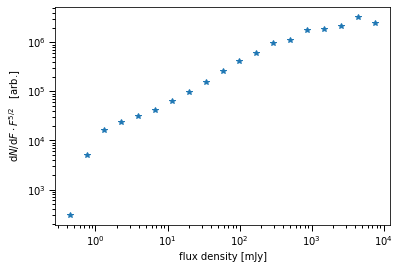

In [25]:
import matplotlib.pyplot as plt
import numpy as np
flux = result['total_flux']
flux_min = np.amin(flux)
flux_max = np.amax(flux)
edges = np.logspace( np.log10(flux_min), np.log10(flux_max), 20 )
hist, bin_edges = np.histogram( flux, bins=edges )
bin_center = 0.5 * ( bin_edges[1:] + bin_edges[:-1])  # gives the center points of the bins
bin_width  = bin_edges[1:] - bin_edges[:-1]           # gives the width of the bins 
dNdF = hist / bin_width 
x = bin_center
y = dNdF * np.power( bin_center , 5/2) 
plt.plot( x, y,  '*' )
plt.xscale('log')
plt.yscale('log')
plt.xlabel('flux density [mJy]')
plt.ylabel(r'${\rm d} N / {\rm d} F  \cdot F^{5/2}$   [arb.]')
print(hist)


## Exercise 4 d : Create your own source count plot

get to lowest possible luminosities in LoTSS DR2 

to do so: select an area in LoTSS DR2 with a very low noise, see Fig 2 in publication

interpret your result: do you see the population of star forming galaxies at higher reshift?

at which flux level does the curve drops due to incompleteness of sources ?


In [32]:
an = 5
ra = 1.234
dec = 9.876
print("bla %03i %010.3f %f" % ( an, ra, dec ) )

bla 005 000001.234 9.876000
